In [11]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd # to play audio in the notebook
import os
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [12]:
TESS = "E:\Important\Code\MinorProject\\final datasets\TESS\TESS Toronto emotional speech set data\\"
RAV = "E:\Important\Code\MinorProject\\final datasets\RAVDESS\\audio_speech_actors_01-24\\"
SAVEE = "E:\Important\Code\MinorProject\\final datasets\SAVEE\ALL\\"
CREMA = "E:\Important\Code\MinorProject\\final datasets\Crema-D\AudioWAV\\"


dir_list = os.listdir(RAV)
dir_list[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

EXPLORING SAVEE

In [13]:
dir_list = os.listdir(SAVEE)

emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)


SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df ['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.head(20)

,labels,source,path
0,male_angry,SAVEE,E:\Important\Code\MinorProject\final datasets\...
1,male_angry,SAVEE,E:\Important\Code\MinorProject\final datasets\...
2,male_angry,SAVEE,E:\Important\Code\MinorProject\final datasets\...
3,male_angry,SAVEE,E:\Important\Code\MinorProject\final datasets\...
4,male_angry,SAVEE,E:\Important\Code\MinorProject\final datasets\...
5,male_angry,SAVEE,E:\Important\Code\MinorProject\final datasets\...
6,male_angry,SAVEE,E:\Important\Code\MinorProject\final datasets\...
7,male_angry,SAVEE,E:\Important\Code\MinorProject\final datasets\...
8,male_angry,SAVEE,E:\Important\Code\MinorProject\final datasets\...
9,male_angry,SAVEE,E:\Important\Code\MinorProject\final datasets\...


In [14]:
SAVEE_df.labels.value_counts()

male_neutral     120
male_angry        60
male_disgust      60
male_fear         60
male_happy        60
male_sad          60
male_surprise     60
Name: labels, dtype: int64

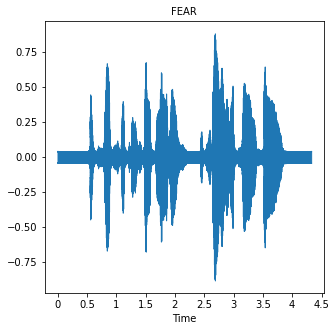

In [15]:
fname = SAVEE + '\DC_f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(5, 5))
librosa.display.waveshow(data, sr = sampling_rate)
plt.title('FEAR', size  = 10)

# Audio
ipd.Audio(fname)

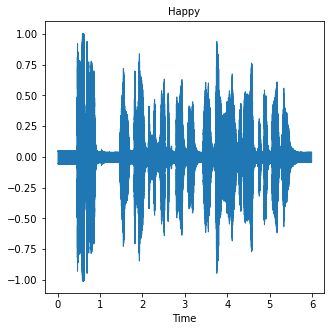

In [16]:
fname = SAVEE + '\DC_h11.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize = (5, 5))
librosa.display.waveshow(data, sr = sampling_rate)
plt.title('Happy', size = 10)

ipd.Audio(fname)

RAVDESS

In [17]:
dir_list = os.listdir(RAV)
dir_list.sort()

for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')  
        print(part) 



['03', '01', '01', '01', '01', '01', '01']
['03', '01', '01', '01', '01', '02', '01']
['03', '01', '01', '01', '02', '01', '01']
['03', '01', '01', '01', '02', '02', '01']
['03', '01', '02', '01', '01', '01', '01']
['03', '01', '02', '01', '01', '02', '01']
['03', '01', '02', '01', '02', '01', '01']
['03', '01', '02', '01', '02', '02', '01']
['03', '01', '02', '02', '01', '01', '01']
['03', '01', '02', '02', '01', '02', '01']
['03', '01', '02', '02', '02', '01', '01']
['03', '01', '02', '02', '02', '02', '01']
['03', '01', '03', '01', '01', '01', '01']
['03', '01', '03', '01', '01', '02', '01']
['03', '01', '03', '01', '02', '01', '01']
['03', '01', '03', '01', '02', '02', '01']
['03', '01', '03', '02', '01', '01', '01']
['03', '01', '03', '02', '01', '02', '01']
['03', '01', '03', '02', '02', '01', '01']
['03', '01', '03', '02', '02', '02', '01']
['03', '01', '04', '01', '01', '01', '01']
['03', '01', '04', '01', '01', '02', '01']
['03', '01', '04', '01', '02', '01', '01']
['03', '01'

In [18]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.head(20)

,labels,source,path
0,male_neutral,RAVDESS,E:\Important\Code\MinorProject\final datasets\...
1,male_neutral,RAVDESS,E:\Important\Code\MinorProject\final datasets\...
2,male_neutral,RAVDESS,E:\Important\Code\MinorProject\final datasets\...
3,male_neutral,RAVDESS,E:\Important\Code\MinorProject\final datasets\...
4,male_neutral,RAVDESS,E:\Important\Code\MinorProject\final datasets\...
5,male_neutral,RAVDESS,E:\Important\Code\MinorProject\final datasets\...
6,male_neutral,RAVDESS,E:\Important\Code\MinorProject\final datasets\...
7,male_neutral,RAVDESS,E:\Important\Code\MinorProject\final datasets\...
8,male_neutral,RAVDESS,E:\Important\Code\MinorProject\final datasets\...
9,male_neutral,RAVDESS,E:\Important\Code\MinorProject\final datasets\...


In [19]:
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_happy          96
male_sad            96
male_angry          96
male_fear           96
male_disgust        96
male_surprise       96
female_happy        96
female_sad          96
female_angry        96
female_fear         96
female_disgust      96
female_surprise     96
Name: labels, dtype: int64

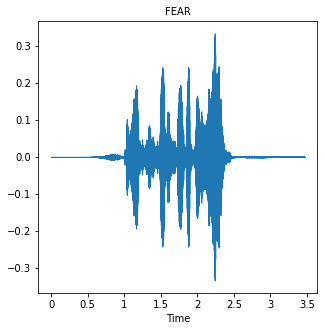

In [20]:
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'
data, sample_rate = librosa.load(fname)
plt.figure(figsize = (5, 5))
librosa.display.waveshow(data, sr = sample_rate)
plt.title('FEAR', size = 10)

ipd.Audio(fname)

TESS

In [21]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [22]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.head(10)

,labels,source,path
0,female_fear,TESS,E:\Important\Code\MinorProject\final datasets\...
1,female_fear,TESS,E:\Important\Code\MinorProject\final datasets\...
2,female_fear,TESS,E:\Important\Code\MinorProject\final datasets\...
3,female_fear,TESS,E:\Important\Code\MinorProject\final datasets\...
4,female_fear,TESS,E:\Important\Code\MinorProject\final datasets\...
5,female_fear,TESS,E:\Important\Code\MinorProject\final datasets\...
6,female_fear,TESS,E:\Important\Code\MinorProject\final datasets\...
7,female_fear,TESS,E:\Important\Code\MinorProject\final datasets\...
8,female_fear,TESS,E:\Important\Code\MinorProject\final datasets\...
9,female_fear,TESS,E:\Important\Code\MinorProject\final datasets\...


In [23]:
TESS_df.labels.value_counts()

female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
Name: labels, dtype: int64

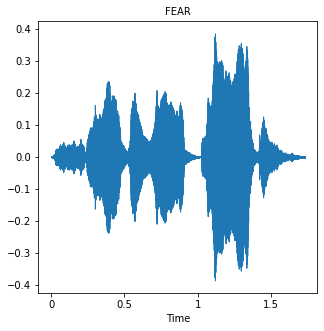

In [24]:
fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(5, 5))
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('FEAR', size = 10)

ipd.Audio(fname)

CREMA-D

In [25]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [26]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.head()

,labels,source,path
0,male_angry,CREMA,E:\Important\Code\MinorProject\final datasets\...
1,male_disgust,CREMA,E:\Important\Code\MinorProject\final datasets\...
2,male_fear,CREMA,E:\Important\Code\MinorProject\final datasets\...
3,male_happy,CREMA,E:\Important\Code\MinorProject\final datasets\...
4,male_neutral,CREMA,E:\Important\Code\MinorProject\final datasets\...


In [27]:
CREMA_df.labels.value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

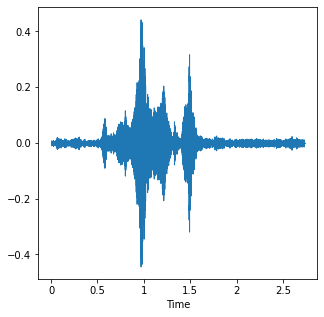

In [28]:
fname = CREMA + '1012_IEO_HAP_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(5, 5))
librosa.display.waveshow(data, sr=sampling_rate)

 
ipd.Audio(fname)

all datasets together

female_happy       1096
female_sad         1096
female_angry       1096
female_fear        1096
female_disgust     1096
female_neutral     1056
male_neutral        839
male_angry          827
male_disgust        827
male_fear           827
male_happy          827
male_sad            827
female_surprise     496
male_surprise       156
Name: labels, dtype: int64


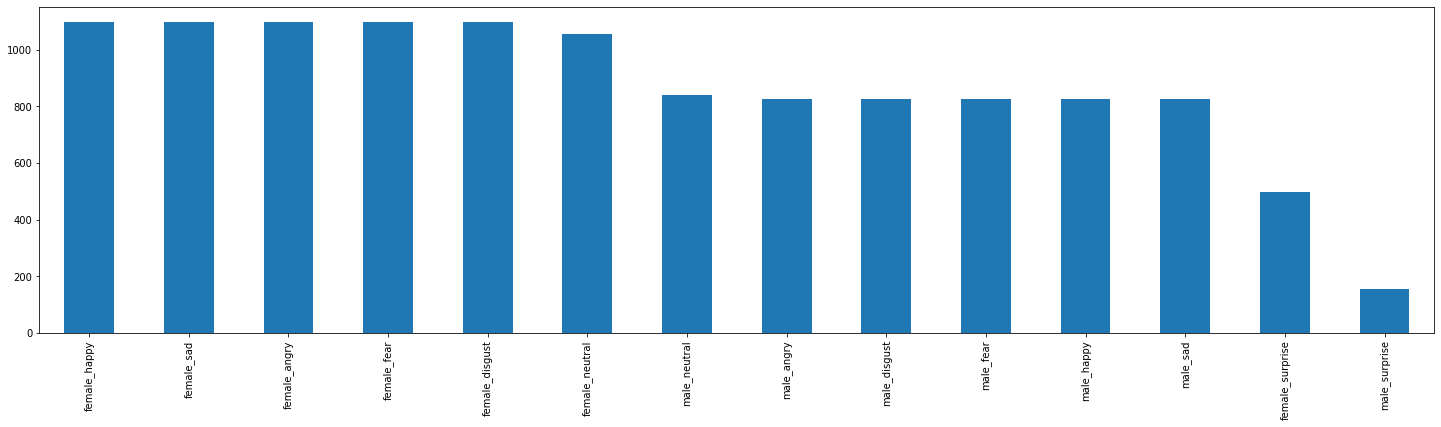

In [29]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
plt.figure(figsize = (25, 6))
df.labels.value_counts().plot(kind = 'bar')
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

In [30]:
df.shape

(12162, 3)

FEATURE EXTRACTION

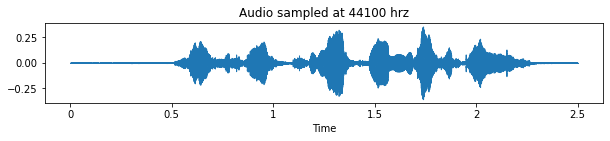

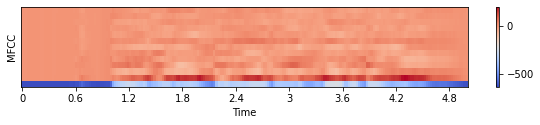

In [34]:

path = "E:\Important\Code\MinorProject\\final datasets\RAVDESS\\audio_speech_actors_01-24\Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(10, 5))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(10, 5))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

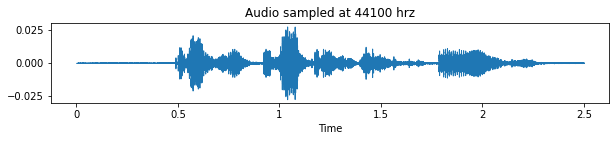

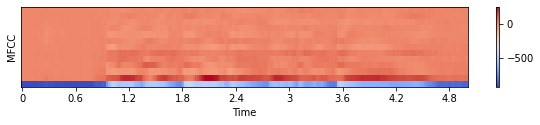

In [32]:
path = "E:\Important\Code\MinorProject\\final datasets\RAVDESS\\audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(10, 5))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(10, 5))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

###### male and female feature difference:-

216
216


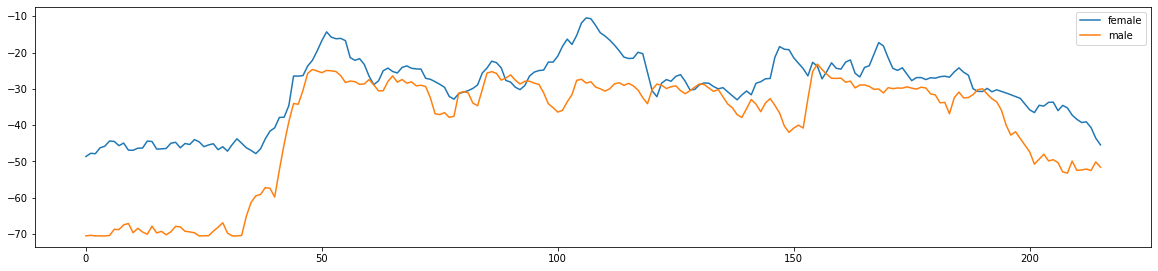

In [39]:
# Female
path = "E:\Important\Code\MinorProject\\final datasets\RAVDESS\\audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Male
path = "E:\Important\Code\MinorProject\\final datasets\RAVDESS\\audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()